In [5]:
!pip install nest_asyncio

In [6]:

import nest_asyncio
nest_asyncio.apply()

In [7]:

# AAS project will go here
import sys
import datetime
from netaddr import IPNetwork, IPAddress, IPSet
import pyshark

In [19]:
async def pktHandler(timestamp,srcIP,dstIP,lengthIP,sampDelta,outfile):
    global scnets
    global ssnets
    global npkts
    global T0
    global outc
    global last_ks
    
    if (IPAddress(srcIP) in scnets and IPAddress(dstIP) in ssnets) or (IPAddress(srcIP) in ssnets and IPAddress(dstIP) in scnets):
        if npkts==0:
            T0=float(timestamp)
            last_ks=0
            
        ks=int((float(timestamp)-T0)/sampDelta)
        
        if ks>last_ks:
            outfile.write('{} {} {} {} {}\n'.format(last_ks,*outc))
            #print('{} {} {} {} {}'.format(last_ks,*outc))
            outc=[0,0,0,0]  
            
        if ks>last_ks+1:
            for j in range(last_ks+1,ks):
                outfile.write('{} {} {} {} {}\n'.format(j,*outc))
                #print('{} {} {} {} {}'.format(j,*outc))
                  
        
        if IPAddress(srcIP) in scnets: #Upload
            outc[0]=outc[0]+1
            outc[1]=outc[1]+int(lengthIP)

        if IPAddress(dstIP) in scnets: #Download
            outc[2]=outc[2]+1
            outc[3]=outc[3]+int(lengthIP)
        
        last_ks=ks
        npkts=npkts+1

In [20]:
# code from basePktSampling
# Pcket sampling

# ------Variables go here-------
CNETS="172.16.183.0/24" # client (src)
sampDelta=1
SNETS="0.0.0.0/0" # service (dest)
fileOutput="clean_sampled_data.dat"
fileInput="cleanest_dset.pcapng"
#--------------------------------


cnets=[]
nn=IPNetwork(CNETS)
cnets.append(nn)

global scnets
scnets=IPSet(cnets)

snets=[]
nn=IPNetwork(SNETS)
snets.append(nn)

global ssnets
ssnets=IPSet(snets)

global npkts
global T0
global outc
global last_ks

npkts=0
outc=[0,0,0,0]

outfile = open(fileOutput,'w')

capture = pyshark.FileCapture(fileInput,display_filter='ip')
for pkt in capture:
    timestamp,srcIP,dstIP,lengthIP=pkt.sniff_timestamp,pkt.ip.src,pkt.ip.dst,pkt.ip.len
    await pktHandler(timestamp,srcIP,dstIP,lengthIP,sampDelta,outfile)

outfile.close()

step_name="packet sampling"
# interval up_pack up_bytes down_pack down_bytes

In [21]:
# Infected data
# Pcket sampling

# ------Variables go here-------
CNETS="172.16.183.0/24" # client (src)
sampDelta=1
SNETS="0.0.0.0/0" # service (dest)
fileOutput="infected_sampled_data.dat"
fileInput="infestedest_dset.pcapng"
#--------------------------------


cnets=[]
nn=IPNetwork(CNETS)
cnets.append(nn)

global scnets
scnets=IPSet(cnets)

snets=[]
nn=IPNetwork(SNETS)
snets.append(nn)

global ssnets
ssnets=IPSet(snets)

global npkts
global T0
global outc
global last_ks

npkts=0
outc=[0,0,0,0]

outfile = open(fileOutput,'w') 

capture = pyshark.FileCapture(fileInput,display_filter='ip')
for pkt in capture:
    timestamp,srcIP,dstIP,lengthIP=pkt.sniff_timestamp,pkt.ip.src,pkt.ip.dst,pkt.ip.len
    await pktHandler(timestamp,srcIP,dstIP,lengthIP,sampDelta,outfile)

outfile.close()

# interval up_pack up_bytes down_pack down_bytes

In [142]:
# Total values

def showChart(clean_data,infected_data,name:str="placeholder"):
        print(clean_data.shape)
        print(infected_data.shape)
        diff = clean_data.shape[0]-infected_data.shape[0]
        if diff<0:
            print(clean_data.shape)
            clean_data= np.pad(clean_data, ((0,diff),(0, 0)), 
                                  mode="constant")
            print(clean_data.shape)
            
        if diff>0:
            print(infected_data.shape)
            infected_data= np.pad(infected_data, ((0,diff),(0, 0)), 
                                  mode="constant")
            print(infected_data.shape)
        print(name)
        plt.figure(figsize=(15,15))
        plt.subplot(2,1,1)
        plt.plot(clean_data[:,1],infected_data[:,1])
        plt.xlabel('Time (s)')
        plt.ylabel('Nº of Packets (Upload)')
        plt.legend()

        plt.subplot(2,1,2)
        plt.plot(clean_data[:,2],infected_data[:,2])
        plt.xlabel('Time (s)')
        plt.ylabel('Byte count (Upload)')
        plt.show()
        
def showChart_but_chatgpt_did_it_upload(clean_data, infected_data, name:str="placeholder"):
    diff = clean_data.shape[0] - infected_data.shape[0]
    if diff < 0:
        clean_data = np.pad(clean_data, ((0, diff), (0, 0)), mode="constant")
    elif diff > 0:
        infected_data = np.pad(infected_data, ((0, diff), (0, 0)), mode="constant")
    
    plt.figure(figsize=(15, 15))
    plt.subplot(2,1,1)
    plt.plot(infected_data[:, 1], label="infected data")
    plt.plot(clean_data[:, 1], label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Nº of Packets')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(infected_data[:, 2], label="infected data")
    plt.plot(clean_data[:, 2], label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.legend()
    plt.suptitle("Upload")
    plt.show()

def showChart_but_chatgpt_did_it_download(clean_data, infected_data, name:str="placeholder"):
    diff = clean_data.shape[0] - infected_data.shape[0]
    if diff < 0:
        clean_data = np.pad(clean_data, ((0, diff), (0, 0)), mode="constant")
    elif diff > 0:
        infected_data = np.pad(infected_data, ((0, diff), (0, 0)), mode="constant")

    plt.figure(figsize=(15, 15))
    plt.subplot(2,1,1)
    plt.plot(infected_data[:, 3], label="infected data")
    plt.plot(clean_data[:, 3], label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Nº of Packets')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(infected_data[:, 4], label="infected data")
    plt.plot(clean_data[:, 4], label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.legend()
    plt.suptitle("Download")

    plt.show()


[[    0    17  1589    18 17215]
 [    1    45  5987    45 27535]
 [    2    10   680    10  1173]
 ...
 [ 5071    54  8076    51 14498]
 [ 5072    45  8073    53 10021]
 [ 5073    25  3666    29 16516]]


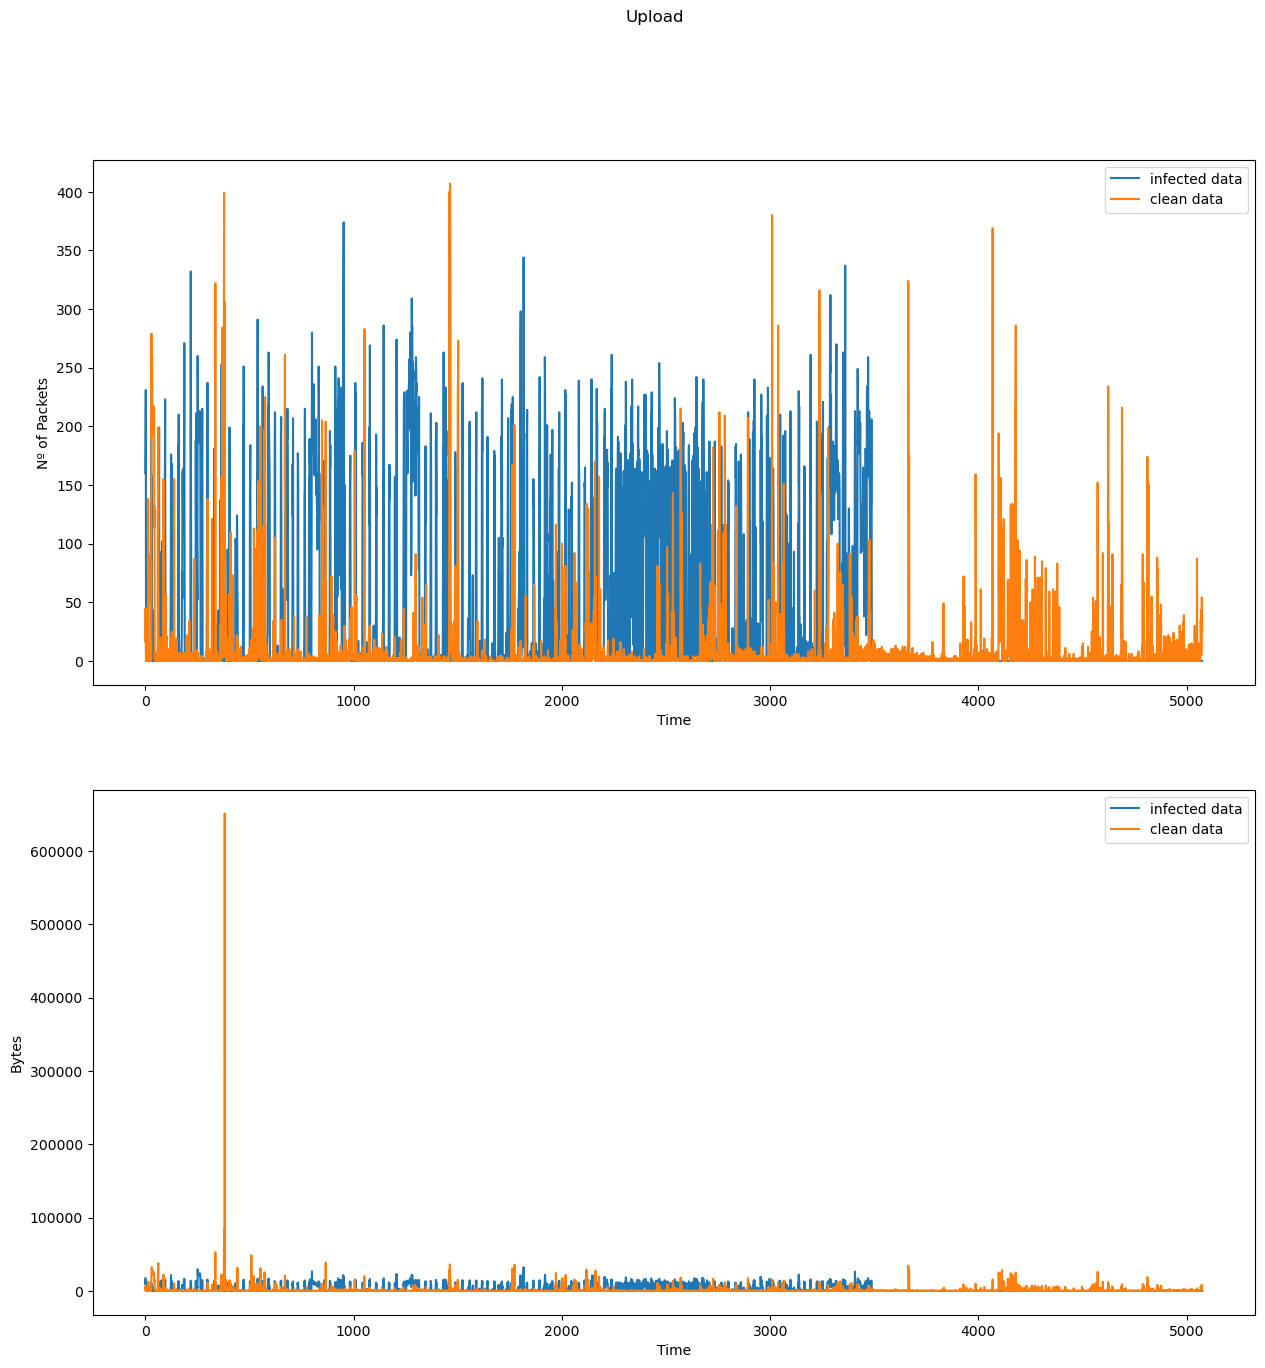

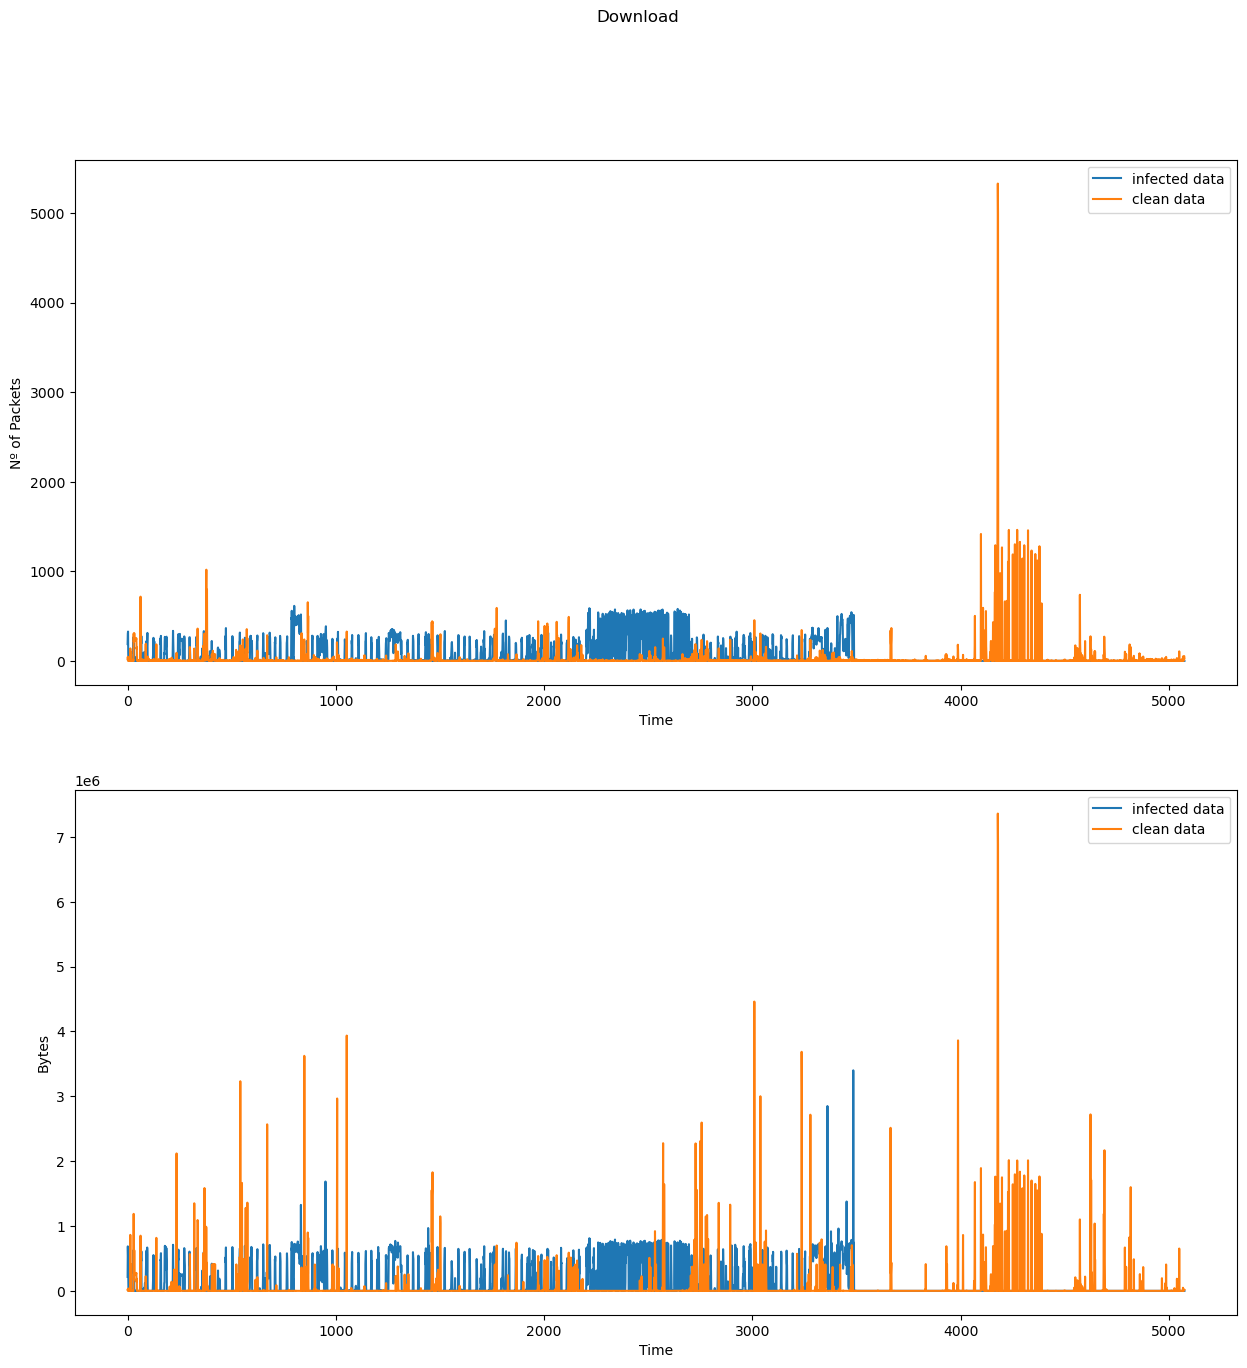

In [144]:
clean_data=np.loadtxt("clean_sampled_data.dat",dtype=int)
infected_data=np.loadtxt("infected_sampled_data.dat",dtype=int)
showChart_but_chatgpt_did_it_upload(clean_data,infected_data,"Upload")
showChart_but_chatgpt_did_it_download(clean_data,infected_data,"Download")


In [131]:
# Bytes over packets
def showChart_upload_ratio(clean_data, infected_data, name:str="placeholder"):
    diff = clean_data.shape[0] - infected_data.shape[0]
    if diff < 0:
        clean_data = np.pad(clean_data, ((0, diff), (0, 0)), mode="constant")
    elif diff > 0:
        infected_data = np.pad(infected_data, ((0, diff), (0, 0)), mode="constant")
    
    # Calculate the average number of bytes per packet for each row
    clean_avg_bytes_per_packet =  [clean_data[x, 2] / clean_data[x, 1]  if clean_data[x,1]!=0 else 0 for x in range(clean_data.shape[0]) ]
    infected_avg_bytes_per_packet =[infected_data[x, 2] / infected_data[x, 1]  if infected_data[x,1]!=0 else 0 for x in range(infected_data.shape[0]) ]
 
    plt.figure(figsize=(15, 15))
    plt.subplot(2,1,1)
    plt.plot(infected_avg_bytes_per_packet, label="infected data")
    plt.plot(clean_avg_bytes_per_packet, label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Nº of Packets')
    plt.title("Upload")
    plt.legend()

    
    clean_avg_bytes_per_packet =  [clean_data[x, 4] / clean_data[x, 3]  if clean_data[x,3]!=0 else 0 for x in range(clean_data.shape[0]) ]
    infected_avg_bytes_per_packet =[infected_data[x, 4] / infected_data[x, 3]  if infected_data[x,3]!=0 else 0 for x in range(infected_data.shape[0]) ]
 


    plt.subplot(2,1,2)
    plt.plot(clean_avg_bytes_per_packet, label="infected data")
    plt.plot(infected_avg_bytes_per_packet, label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.legend()
    plt.title("Download")
    plt.suptitle("Bytes/Packets Ratio")
    plt.show()
    
    

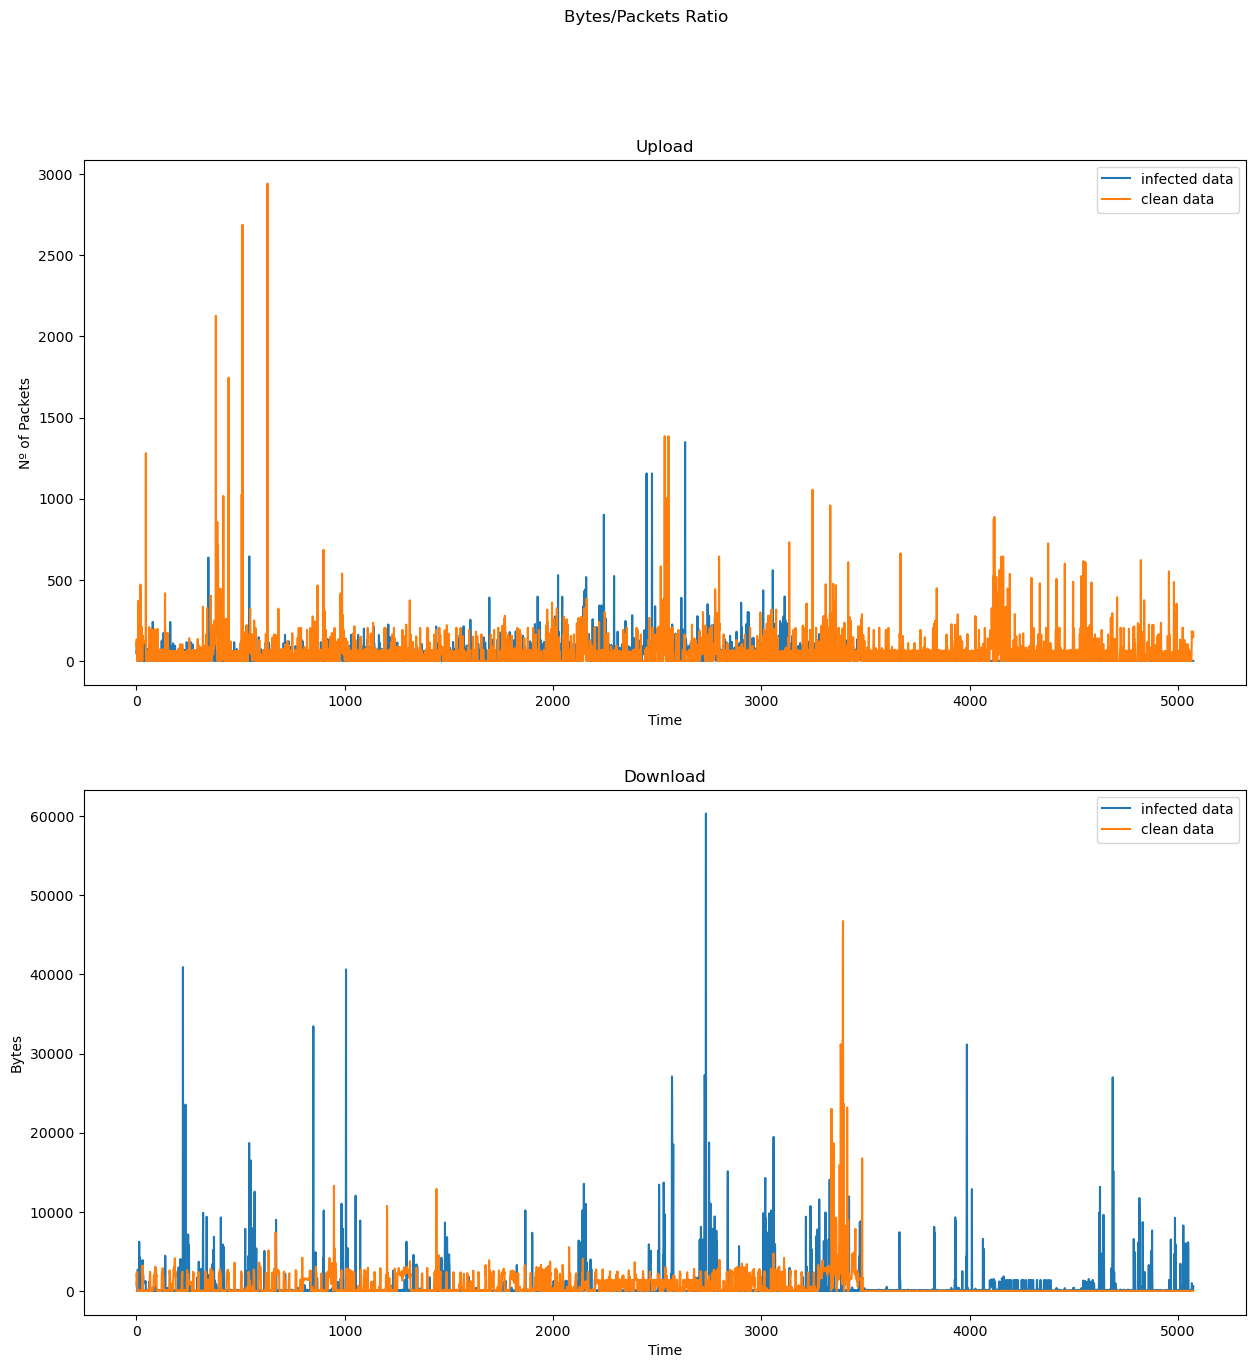

In [132]:
showChart_upload_ratio(clean_data,infected_data)


In [151]:
# Cumulative sum for evolution of packets/bytes

def showChart_bytes_csum(clean_data, infected_data, name:str="placeholder"):
    diff = clean_data.shape[0] - infected_data.shape[0]
    if diff < 0:
        clean_data = np.pad(clean_data, ((0, diff), (0, 0)), mode="constant")
    elif diff > 0:
        infected_data = np.pad(infected_data, ((0, diff), (0, 0)), mode="constant")
    
    # Calculate the average number of bytes per packet for each row
    clean_cumulative_bytes_sent = np.cumsum(clean_data[:, 2])
    infected_cumulative_bytes_sent = np.cumsum(infected_data[:, 2]) 
    plt.figure(figsize=(15, 15))
    plt.subplot(2,1,1)
    plt.plot(infected_cumulative_bytes_sent, label="infected data")
    plt.plot(clean_cumulative_bytes_sent, label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.title("Upload")
    plt.legend()

    
    clean_cumulative_bytes_sent = np.cumsum(clean_data[:, 4])
    infected_cumulative_bytes_sent = np.cumsum(infected_data[:, 4]) 
 


    plt.subplot(2,1,2)
    plt.plot(infected_cumulative_bytes_sent, label="infected data")
    plt.plot(clean_cumulative_bytes_sent, label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.legend()
    plt.title("Download")
    plt.suptitle("Total Bytes Sent/Received")
    plt.show()

def showChart_packets_csum(clean_data, infected_data, name:str="placeholder"):
    diff = clean_data.shape[0] - infected_data.shape[0]
    if diff < 0:
        clean_data = np.pad(clean_data, ((0, diff), (0, 0)), mode="constant")
    elif diff > 0:
        infected_data = np.pad(infected_data, ((0, diff), (0, 0)), mode="constant")
    
    # Calculate the average number of bytes per packet for each row
    clean_cumulative_bytes_sent = np.cumsum(clean_data[:, 1])
    infected_cumulative_bytes_sent = np.cumsum(infected_data[:, 1]) 
    plt.figure(figsize=(15, 15))
    plt.subplot(2,1,1)
    plt.plot(infected_cumulative_bytes_sent, label="infected data")
    plt.plot(clean_cumulative_bytes_sent, label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Packets')
    plt.title("Upload")
    plt.legend()

    
    clean_cumulative_bytes_sent = np.cumsum(clean_data[:, 3])
    infected_cumulative_bytes_sent = np.cumsum(infected_data[:, 3]) 
 


    plt.subplot(2,1,2)
    plt.plot(infected_cumulative_bytes_sent, label="infected data")
    plt.plot(clean_cumulative_bytes_sent, label="clean data")
    plt.xlabel('Time')
    plt.ylabel('Packets')
    plt.legend()
    plt.title("Download")
    plt.suptitle("Total Packets Sent/Received")
    plt.show()

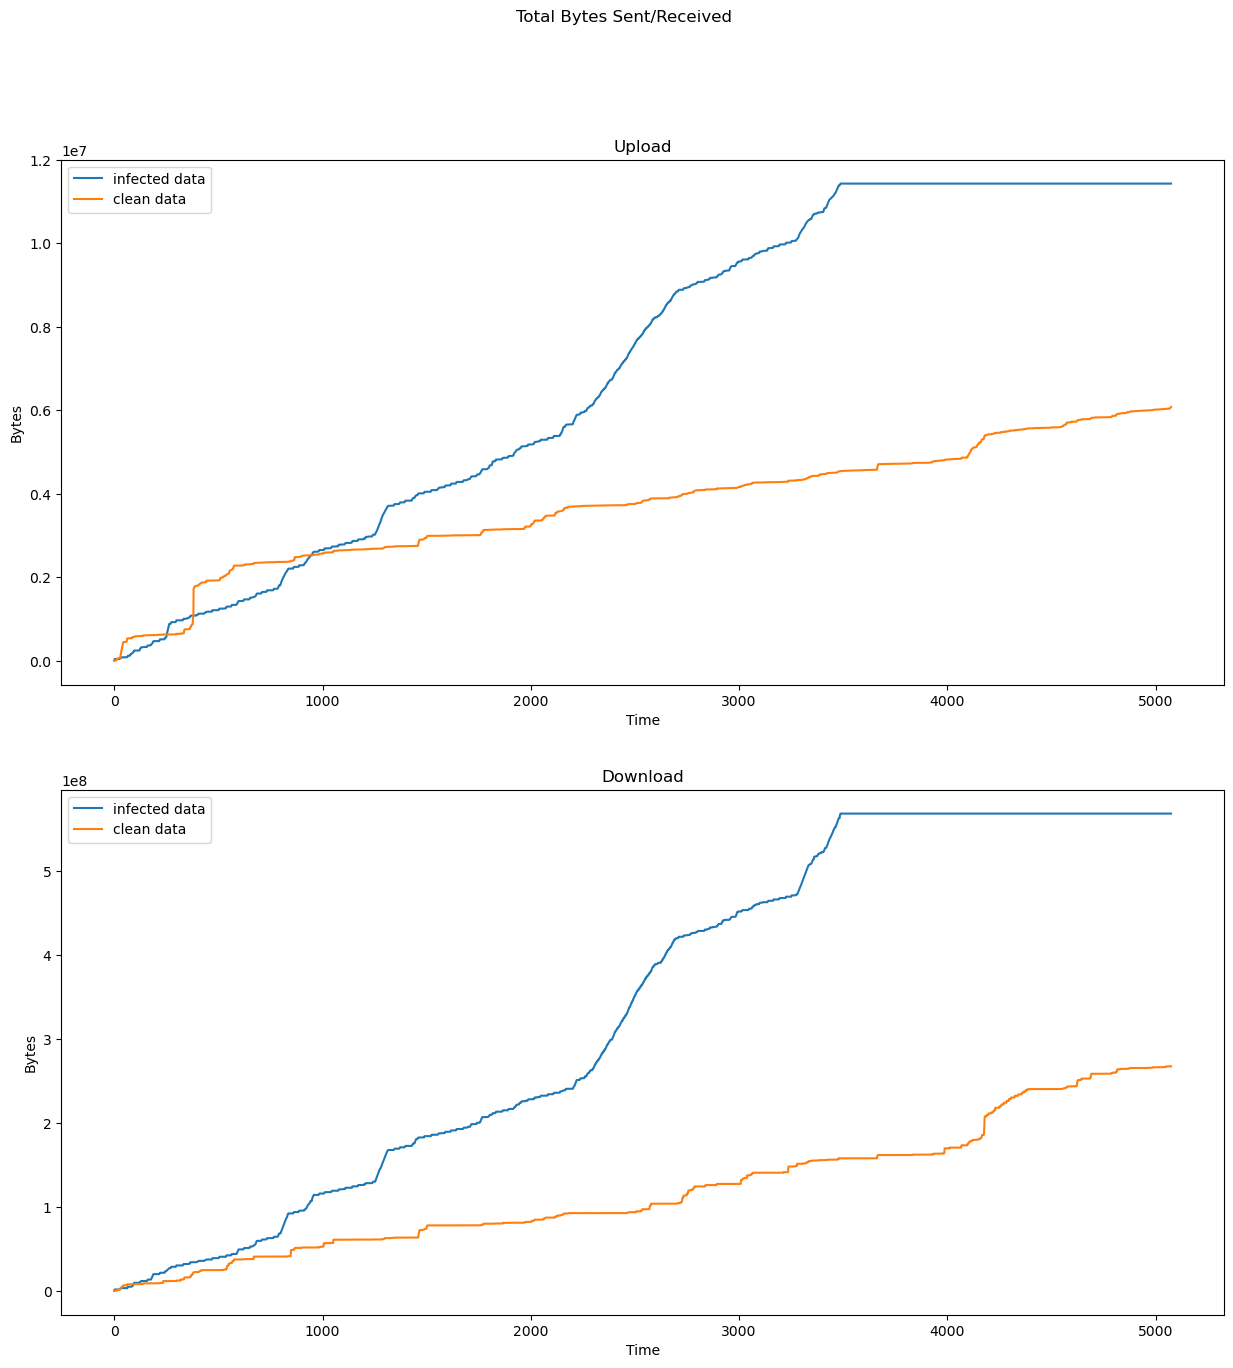

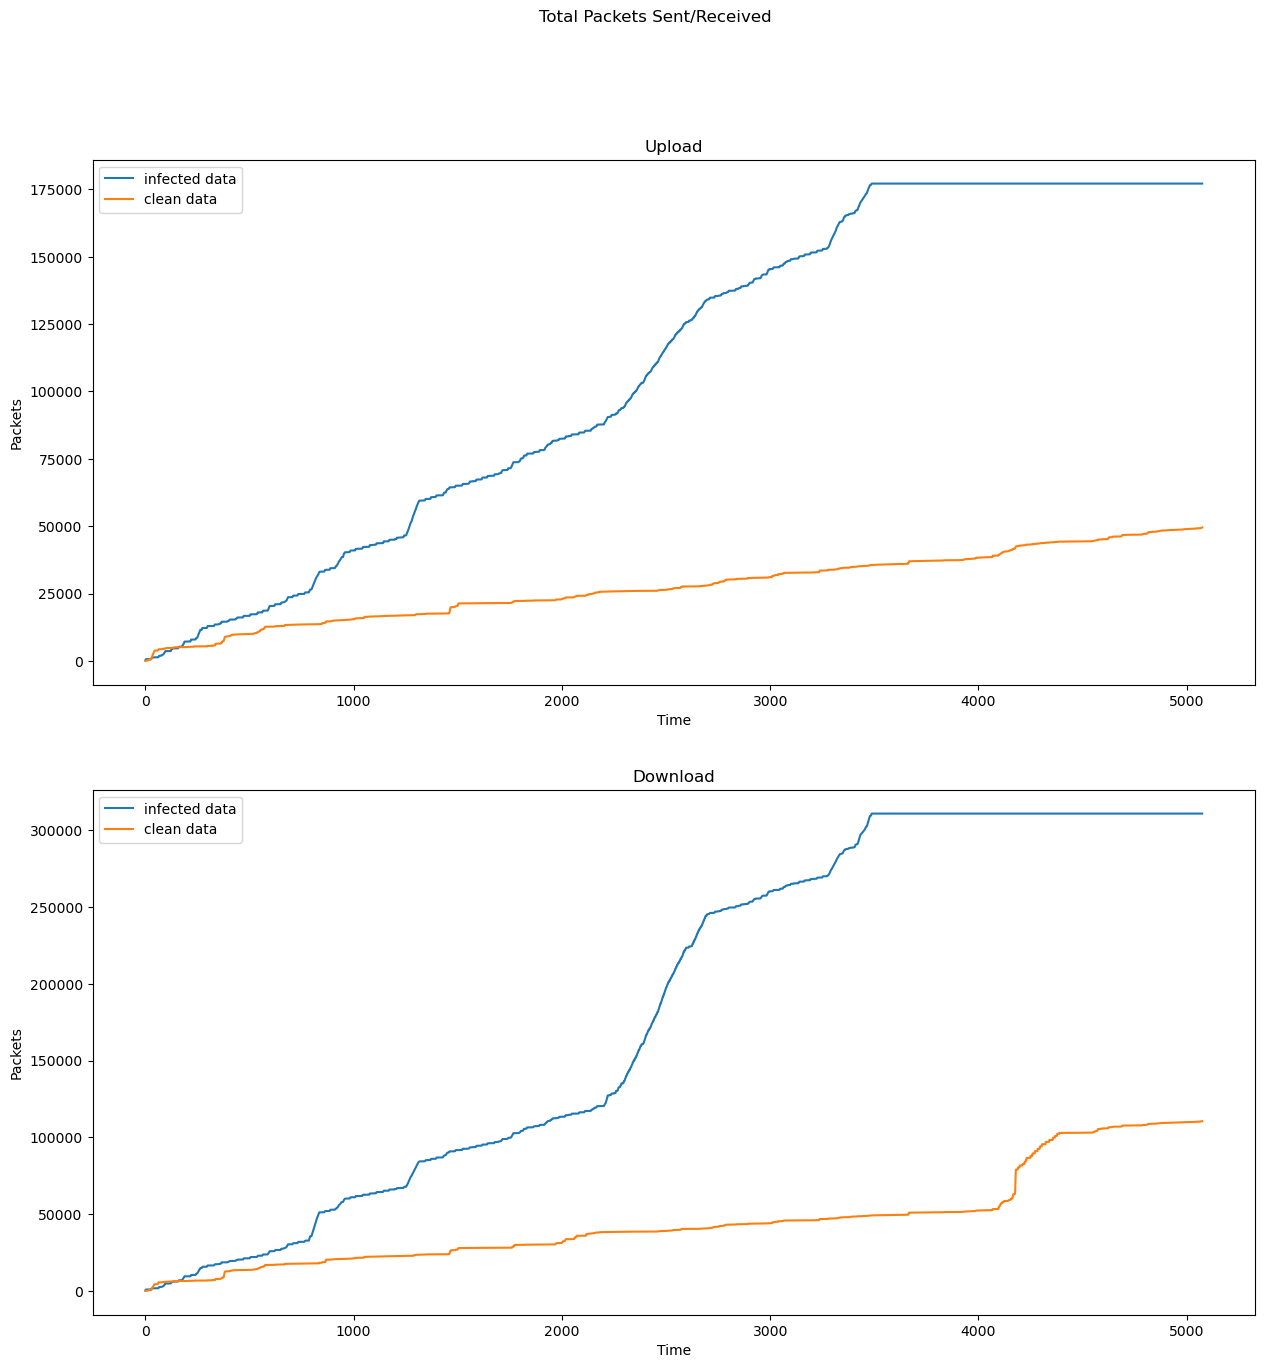

In [152]:
showChart_bytes_csum(clean_data,infected_data)
showChart_packets_csum(clean_data,infected_data)

In [150]:
# analyze with sliding window

import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
def slidingObsWindow(data,lengthObsWindow,slidingValue,basename):
    iobs=0
    nSamples,nMetrics=data.shape
    obsData=np.zeros((0,lengthObsWindow,nMetrics))
    for s in np.arange(lengthObsWindow,nSamples,slidingValue):
        subdata=data[s-lengthObsWindow:s,:]
        obsData=np.insert(obsData,iobs,subdata,axis=0)

        obsFname="{}_obs{}_w{}.dat".format(basename,iobs,lengthObsWindow)
        iobs+=1
        np.savetxt(obsFname,subdata,fmt='%d')

    return obsData # 3D arrays (obs, sample, metric)

In [15]:
fileInput="1_sampled_data.dat"
lengthObsWindow=[15]
slidingValue=3

data=np.loadtxt(fileInput,dtype=int)
fname=''.join(fileInput.split('.')[:-1])

dirname=fname+"_obs_s{}_m{}".format(slidingValue,"2")

os.mkdir(dirname)
basename=dirname+"/"+fname

print("\n\n### SLIDING Observation Windows with Length {} and Sliding {} ###".format(lengthObsWindow[0],slidingValue))
obsData=slidingObsWindow(data,lengthObsWindow[0],slidingValue,basename)
print(obsData)



### SLIDING Observation Windows with Length 15 and Sliding 3 ###
[[[0.00000e+00 1.70000e+01 1.58900e+03 1.80000e+01 1.72150e+04]
  [1.00000e+00 4.50000e+01 5.98700e+03 4.50000e+01 2.75350e+04]
  [2.00000e+00 1.00000e+01 6.80000e+02 1.00000e+01 1.17300e+03]
  ...
  [1.20000e+01 1.60000e+01 2.79000e+03 1.60000e+01 1.89100e+03]
  [1.30000e+01 1.38000e+02 8.38200e+03 1.39000e+02 8.63539e+05]
  [1.40000e+01 5.00000e+01 1.26100e+04 5.40000e+01 2.32840e+04]]

 [[3.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
  [4.00000e+00 3.00000e+00 2.75000e+02 3.00000e+00 3.29700e+03]
  [5.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
  ...
  [1.50000e+01 9.10000e+01 1.19750e+04 9.70000e+01 4.11628e+05]
  [1.60000e+01 1.00000e+01 1.80500e+03 1.00000e+01 1.40600e+03]
  [1.70000e+01 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]]

 [[6.00000e+00 1.40000e+01 8.03000e+02 1.40000e+01 3.74540e+04]
  [7.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
  [8.00000e+00 8.0000

In [14]:
# Extract Features
import argparse
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from baseObsWindows import slidingMultObsWindow
import os

def extractFeatures(dirname,basename,nObs,allwidths):
    for o in range(0,nObs):
        features=np.array([])
        for oW in allwidths:
            obsfilename=dirname+"/"+basename+str(o)+"_w"+str(oW)+".dat"
            # print(obsfilename)
            subdata=np.loadtxt(obsfilename)[:,1:]    #Loads data and removes first column (sample index)
                
            faux=extractStats(subdata)    
            features=np.hstack((features,faux))
            
            # faux2=extractStatsSilenceActivity(subdata)
            # features=np.hstack((features,faux2))
        if o==0:
            obsFeatures=features
        else:
            obsFeatures=np.vstack((obsFeatures,features))

    return obsFeatures


def extractStatsSilenceActivity(data):
    features=[]
    nSamples,nMetrics=data.shape
    silence_features=np.array([])
    activity_features=np.array([])
    for c in range(nMetrics):
        silence,activity=extratctSilenceActivity(data[:,c],threshold=0)
        
        if len(silence)>0:
            silence_faux=np.array([len(silence),np.mean(silence),np.std(silence)])
        else:
            silence_faux=np.zeros(3)
        silence_features=np.hstack((silence_features,silence_faux))
        
        if len(activity)>0:
            activity_faux=np.array([len(activity),np.mean(activity),np.std(activity)])
        else:
            activity_faux=np.zeros(3)
        activity_features=np.hstack((activity_features,activity_faux))       
            
    features=np.hstack((silence_features,activity_features))
        
    return(features)

# 4 colunas (2*up+2*down) * (8 features + 6 do silence^(3*2)) 

# up_pack (0:media 1:mediana 2:std 3:skew 4:75p 5:90p 6:95p 7:98p 8:len(silence) 9:mean_silence 10:std_silence 11:len(activity) 12:mean_act 13:std_act) ) up_bytes
def extratctSilenceActivity(data,threshold=0):
    if(data[0]<=threshold):
        s=[1]
        a=[]
    else:
        s=[]
        a=[1]
    for i in range(1,len(data)):
        if(data[i-1]>threshold and data[i]<=threshold):
            s.append(1)
        elif(data[i-1]<=threshold and data[i]>threshold):
            a.append(1)
        elif (data[i-1]<=threshold and data[i]<=threshold):
            s[-1]+=1
        else:
            a[-1]+=1
    return(s,a)

def extractStats(data):
    nSamp,nCols=data.shape

    M1=np.mean(data,axis=0)
    Md1=np.median(data,axis=0)
    Std1=np.std(data,axis=0)
    S1=stats.skew(data)
    #K1=stats.kurtosis(data)
    p=[75,90,95,98]
    Pr1=np.array(np.percentile(data,p,axis=0)).T.flatten()
        
    features=np.hstack((M1,Md1,Std1,S1,Pr1))
    return(features)


In [15]:
dirname="1_sampled_data_obs_s3_m2"
allwidths=[15]

allfiles=os.listdir(dirname)
nObs=len([f for f in allfiles if '_w{}.'.format(allwidths[0]) in f])
lbn=allfiles[0].rfind("obs")+3
basename=allfiles[0][:lbn]

features=extractFeatures(dirname,basename,nObs,allwidths)

outfilename=basename+"_features.dat"


np.savetxt(outfilename,features,fmt='%.4f')
print(features.)
print(features.shape)

[[2.38000000e+01 3.23780000e+03 2.44666667e+01 ... 3.34864000e+04
  2.85279500e+05 6.32235200e+05]
 [2.57333333e+01 3.60606667e+03 2.67333333e+01 ... 2.61958400e+05
  5.47201300e+05 7.37003920e+05]
 [2.59333333e+01 3.77580000e+03 2.70000000e+01 ... 2.61958400e+05
  5.47201300e+05 7.37003920e+05]
 ...
 [2.13333333e+00 1.25333333e+02 2.20000000e+00 ... 3.57600000e+02
  6.05100000e+02 8.64240000e+02]
 [8.13333333e+00 1.20320000e+03 9.40000000e+00 ... 1.77468000e+04
  3.01658000e+04 4.07019200e+04]
 [1.40000000e+01 2.09300000e+03 1.46000000e+01 ... 1.93832000e+04
  3.01658000e+04 4.07019200e+04]]
(1687, 32)
